[TFL's documentation](https://tfl.gov.uk/info-for/open-data-users/our-open-data?intcmp=3671)

# Import

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = pandas.read_csv('../data/tfl_raw.csv')
raw.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
0,3,Tue,LUL,Unstarted,Kings Cross M,0,00:00,633,10:33,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day
1,4,Wed,LUL,Unstarted,Sudbury Hill,0,00:00,447,07:27,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
2,3,Tue,NR,Unstarted,Richmond,0,00:00,966,16:06,Z0304,TKT,N,0,0,XX,LUL Travelcard-7 Day
3,4,Wed,NR,Unstarted,Romford,0,00:00,657,10:57,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
4,6,Fri,NR,Unstarted,Norwood Junction SR,0,00:00,450,07:30,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day


In [3]:
raw.count()

downo           2623487
daytype         2623487
SubSystem       2623487
StartStn        2623487
EndStation      2623487
EntTime         2623487
EntTimeHHMM     2623487
ExTime          2623487
EXTimeHHMM      2623487
ZVPPT           2623487
JNYTYP          2623487
DailyCapping    2623487
FFare           2623487
DFare           2623487
RouteID         2623487
FinalProduct    2623487
dtype: int64

# Combine stations

See Locations notebook for details.

In [4]:
combine = (
    ('Balham', 'Balham NR', 'Balham SCL'),
    ('Canary Wharf', 'Canary Wharf DLR', 'Canary Wharf E2'),
    ('Euston', 'Euston NR'),
    ('Fenchurch St NR', 'FENCHURCH ST NR'),
    ("Kings Cross St Pancras", 'Kings Cross', 'Kings Cross M', 'Kings Cross T', 'St Pancras International'),
    ('Liverpool Street', 'Liverpool St WAGN TOC Gates', 'Liverpool St NR'),
    ('Marylebone', 'Marylebone NR'),
    ('Paddington', 'Paddington FGW'),
    ('Shepherds Bush', "Shepherd's Bush NR", "Shepherd's Bush Und"),
    ('Shepherds Bush Market', "Shepherd's Bush Mkt"),
    ('Tottenham Court Road', 'Tottenham Court Rd'),
    ('West Hampstead', "West Hampst'd NL", "West Hampst'd Tlink"),
    ('Victoria', 'Victoria TOCs'),
    ('Waterloo', 'Waterloo JLE'),
    ('Blackhorse Lane TRAM', 'BLCKHRS LNE TRAM'),
    ('Caledonian Road & Barnsbury', "Caledonian Rd&B'sby"),
    ('New Addington TRAM', 'NEW ADDNGTH TRAM'),
    ('Beckenham Road TRAM', 'BECKENHM RD TRAM'),
    ('Harringay Green Lanes', 'Harringay Green Las'),
    ('Sudbury & Harrow Rd', 'Sudbury&Harrow Rd'),
    ('Walthamstow Queens Road', 'Walthamstow Qns R'),
    ('Belgrave Walk TRAM', 'BELGRAVE WK TRAM'),
    ('Addington Village TRAM', 'ADDNGTN VIL TRAM'),
    ('Wimbledon', 'WIMBLEDON TRAM'),
)
substitutions = {}
for i in combine:
    for name in i[1:]:
        substitutions[name] = i[0]

Apply substitutions to the data

In [5]:
raw['StartStn'] = raw['StartStn'].str.strip()
raw['EndStation'] = raw['EndStation'].str.strip()
raw['StartStn'].replace(substitutions, inplace=True)
raw['EndStation'].replace(substitutions, inplace=True)

# Validity

In [6]:
complete_journeys = raw[raw['SubSystem'] != 'LTB'][raw['SubSystem'] != 'TRAM'][raw['SubSystem'] != 'LUL/TRAM'][raw['StartStn'] != 'Unstarted'][raw['EndStation'] != 'Unfinished'][raw['EndStation'] != 'Not Applicable']

/mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [56]:
raw[raw['SubSystem'] != 'LTB'][raw['SubSystem'] != 'TRAM'][raw['SubSystem'] != 'LUL/TRAM'][raw['EndStation'] == 'Not Applicable'].count()

/mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


downo           1
daytype         1
SubSystem       1
StartStn        1
EndStation      1
EntTime         1
EntTimeHHMM     1
ExTime          1
EXTimeHHMM      1
ZVPPT           1
JNYTYP          1
DailyCapping    1
FFare           1
DFare           1
RouteID         1
FinalProduct    1
dtype: int64

In [8]:
complete_journeys['StartStn'].append(complete_journeys['EndStation']).unique()

array(['Goodge Street', 'Preston Road', 'Holborn', 'Earls Court',
       'Victoria', 'Walthamstow Central', 'Highbury', 'Embankment',
       'Monument', 'South Kensington', "St James's Park", 'Bethnal Green',
       'Tower Hill', 'St Pauls', 'High Barnet', 'All Saints', 'Leyton',
       'Kings Cross St Pancras', 'Manor House', 'Woolwich Arsenal DLR',
       'Putney Bridge', 'Southfields', 'Vauxhall', 'Golders Green',
       'Oxford Circus', 'Fulham Broadway', 'Shadwell DLR', 'Bond Street',
       'Camden Town', 'Piccadilly Circus', 'Maida Vale', 'Clapham South',
       'Hammersmith D', 'Gloucester Road', 'East Finchley',
       'Great Portland St', 'Charing Cross', 'Finchley Road',
       'Notting Hill Gate', 'Waterloo', 'Euston Square', 'Edgware Road M',
       'Chancery Lane', 'Wimbledon', 'Baker Street', 'Ealing Broadway',
       'Euston', 'Covent Garden', 'Sloane Square', 'London Bridge',
       'Hyde Park Corner', 'Paddington', 'Knightsbridge', 'Rayners Lane',
       'Hounslow Cen

# By hour

In [9]:
complete_journeys['EntTimeHHMM']=complete_journeys['EntTimeHHMM'].str.slice(0,2)

## By start and end

In [10]:
start_end_by_hour = complete_journeys.groupby(('StartStn', 'EndStation','daytype', 'EntTimeHHMM')).size()
start_end_by_hour = start_end_by_hour.reset_index()
start_end_by_hour.columns = ['Start station', 'End station', 'Day', 'Entry hour', 'Journey count']
start_end_by_hour.head(7)

,Start station,End station,Day,Entry hour,Journey count
0,Acton Central,Acton Central,Sat,18,1
1,Acton Central,Acton Central,Sun,07,1
2,Acton Central,Acton Central,Thu,13,1
3,Acton Central,Acton Central,Wed,17,1
4,Acton Central,Baker Street,Mon,07,1
5,Acton Central,Baker Street,Thu,08,1
6,Acton Central,Baker Street,Tue,08,1


In [11]:
start_end_by_hour.sort_values('Journey count')

,Start station,End station,Day,Entry hour,Journey count
0,Acton Central,Acton Central,Sat,18,1
327683,Notting Hill Gate,Newbury Park,Mon,20,1
327682,Notting Hill Gate,Newbury Park,Mon,09,1
327681,Notting Hill Gate,Newbury Park,Fri,21,1
327680,Notting Hill Gate,Neasden,Wed,21,1
327679,Notting Hill Gate,Neasden,Mon,17,1
327678,Notting Hill Gate,Neasden,Fri,17,1
327677,Notting Hill Gate,Mornington Crescent,Sat,19,1
327676,Notting Hill Gate,Mornington Crescent,Sat,16,1
327675,Notting Hill Gate,Mornington Crescent,Sat,11,1


### Checking

Should both be 765324

In [12]:
start_end_by_hour['Journey count'].sum()

764605

In [13]:
complete_journeys.shape[0]

764605

### Output

In [14]:
# start_end_by_hour.to_csv('../data/journey_count.csv', index=False)

# By days

In [46]:
by_day_time = complete_journeys.groupby(('EntTimeHHMM', 'downo')).size()
by_day_time = by_day_time.reset_index()
by_day_time.columns = ['time', 'day', 'journeys']
by_day_time['time'] = pandas.to_numeric(by_day_time['time'])
by_day_time['day'] -= 1
by_day_time.head()

,time,day,journeys
0,4,1,7
1,4,2,9
2,4,3,15
3,4,4,11
4,4,5,13


In [44]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['pgf.rcfonts'] = False

/mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


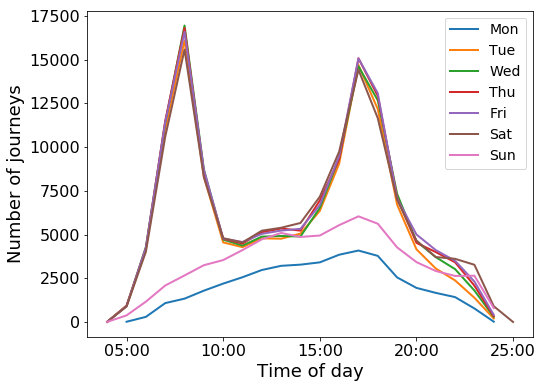

In [45]:
ax = plt.subplot(xlabel='Time of day', ylabel='Number of journeys',)
for daynum, day in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    dat = by_day_time[by_day_time['day']==daynum]
    dat.plot(x='time', y='journeys', ax=ax, label=day)

ax.set_xlabel('Time of day')
ax.set_xticklabels(['{:0>2}:00'.format(int(x)) for x in ax.get_xticks()]);
plt.savefig('../../diss/journeyTime.pgf')

<Figure size 720x432 with 0 Axes>